This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://www.apache.org/licenses/LICENSE-2.0) 

In [1]:
try:
    import byron
except ModuleNotFoundError:
    !pip install -U byron
    import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_2058/288499090.py:2: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://cad-polito-it.github.io/byron/paranoia for details]
  import byron


Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

 # Checks
 
*SElement* contains a list of *checks* that are applied on the node they are in. For instance, given a bunch of size 5

; 🖋 n1 ➜ Frame❬MacroArray#1❭
foo 508  ; 🖋 n1.n2 ➜ Macro❬User#1❭
foo -791  ; 🖋 n1.n3 ➜ Macro❬User#1❭
foo 385  ; 🖋 n1.n4 ➜ Macro❬User#1❭
foo 516  ; 🖋 n1.n5 ➜ Macro❬User#1❭
foo 827  ; 🖋 n1.n6 ➜ Macro❬User#1❭



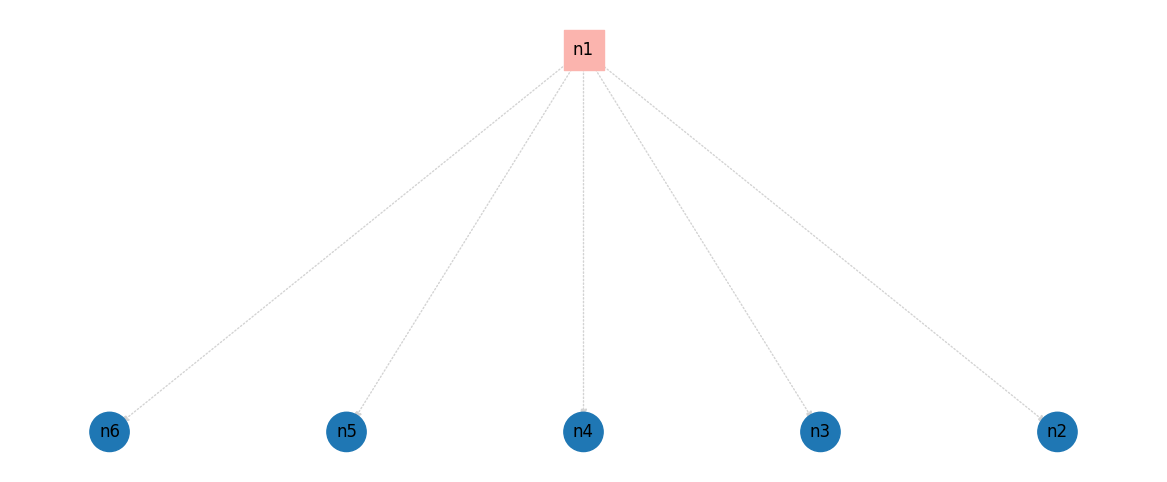

In [2]:
foo = byron.f.macro('foo {num}', num=byron.f.integer_parameter(-1000, +1000))
bunch = byron.f.bunch([foo], size=5)
byron.f.as_text(bunch)
byron.f.as_forest(bunch)

The *SElement* will a function to check that the number of successor is exactly 5

In [3]:
bunch.NODE_CHECKS

(functools.partial(<function _check_out_degree at 0x10770d3a0>, min_=5, max_=6),)

Custom checks can be added, for instance, it is possible to add the constraint that the numbers in *foo* macros must be in decreasing order. Indeed, that would require some additional effort in creating a *valid* individual

In [4]:
def silly_check(nr):
    values = list()
    for succ in nr.children:
        values.append(succ.p.num)  # also succ.p['num']
    return sorted(values, reverse=True) == values


sorted_bunch = byron.f.bunch([foo], size=7)
sorted_bunch.add_node_check(silly_check)
byron.f.as_text(sorted_bunch)

/Users/giovanni/Repos/byron/byron/operators/initializers.py:43: ByronPerformanceWarning: 
  The failure rate of 'unroll_individual' is 98% (2 successes out of 100 calls)
  new_root = unroll_individual(new_individual, top_frame)


; 🖋 n2099 ➜ Frame❬MacroArray#2❭
foo 687  ; 🖋 n2099.n2100 ➜ Macro❬User#1❭
foo 355  ; 🖋 n2099.n2101 ➜ Macro❬User#1❭
foo 280  ; 🖋 n2099.n2102 ➜ Macro❬User#1❭
foo 229  ; 🖋 n2099.n2103 ➜ Macro❬User#1❭
foo -17  ; 🖋 n2099.n2104 ➜ Macro❬User#1❭
foo -592  ; 🖋 n2099.n2105 ➜ Macro❬User#1❭
foo -802  ; 🖋 n2099.n2106 ➜ Macro❬User#1❭

